## Estimating a relationship " $f$ "


- $X=(X_1 + X_2 + X_3 ... X_p)$ : the "input variables" or "predictors". 
- $Y$ : the "output variable" or "response variable". 
- "noise" : $\epsilon$

We hypothesize that, in reality, there exists some relationship, $Y=f(X)+\epsilon$. The true equation for $f$ is almost never known.

### Why do we want to estimate $f$?

This function, $f(X)$ is of much interest. We may wish to obtain a reasonable estimate for it (denoted $\hat{f}(X)$ : said "f-hat of x" : hat usually means "estimate of"), for two reasons. 

1. Prediction.

- It may be easy to measure $X$ and hard to measure $Y$. For example, it might be "hard" to measure the amount of DNA in a sample (what are you going to do, count the molecules?) but "easy" to measure how much light is absorbed by the sample. So we want to determine the an estimate for the relationship between light absorbed ($X$) and DNA in the sample ($Y$), so we can use absorbance to estimate DNA concentration with $Y\approx\hat{Y}=\hat{f}(X)$ (like on the nanodrop). 

 - Once we have this estimate $\hat{f}$, then, to obtain an estimate of $Y$ (denoted $\hat{Y}$) we may first observe $X$, then compute $\hat{Y}=\hat{f}(X)$.
- The accuracy of $\hat{Y}$ as an estimate of $Y$ will depend on two sources of error.
    - reducible error : The difference between $f$ and $\hat{f}$. Can be reduced by better estimates of $f$
    - irreducible error : Even if we find the exact function such that $f=\hat{f}$, we still have some error, as 
        - $\hat{Y}=\hat{f}(X)=f(X)\neq f(X)+\epsilon=Y$
    - irreducible error comes from $\epsilon$

2.Inference

- The relationship between $X$ and $Y$ may itself be of interest. For example:
    - Which predictors in $X$ are the most important? ("Which genetic locus is most associated with risk of xyz disease?")
    - What is the relationship of particular predictors with $Y$? Is the relationship positive? Negative? Of what magnitude?
    - ("Is an A allele associated with more or less xyz disease? How much more or less?")
    - Is the relationship between the predictors and $Y$ linear? Or something else?

### There are two ways we can estimate $f$.

Both use training some set of $n$ "training data" points.

$x_{ij}$ represents the $j$th predictor of the $i$th data point. In total, we have $p$ predictors and $n$ data points.

\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1i} \\
x_{21} & x_{22} & \cdots & x_{2i} \\
\vdots & \vdots & \ddots & \vdots \\
x_{p1} & x_{p2} & \cdots & x_{pi}
\end{bmatrix}


Then the training data consist of 
$\{ (x_1,y_1),(x_2,y_2), \cdots , (x_n,y_n) \}$ 

Where 
$
x_i=\begin{bmatrix}
x_{i1} \\
x_{i2} \\
\vdots \\
x_{ip}
\end{bmatrix}
$

(That is: it's a column of the above matrix).

The two ways:

1. Parametric estimation

In parametric estimation, we guess what the form of the equation $f$ is, then use data to "fill in the blanks". For example, we might guess the following form:

$f(X)=\beta_0+\beta_1X_1+\beta_2X_2+\cdots+\beta_pX_p$

A concrete example of what a model like this might look like is:

$income=\beta_0+\beta_1\cdot education+\beta_1\cdot seniority$

For preducting income based on an employees education 

In this case, our parametric assumption is a "linear relationship" between the predictors and output. We would then use our training data to "fill in" all the $\beta$ values (the parameters). There are many ways to do this. For linear models, one of the most popular approches is called "least squares". 

You can also see how the $\beta$ values have comprehensible meanings. If $\beta_1>0$, then more education means more pay. If $\beta_1=0$ then the amount of education doesn't matter for pay. If $\beta_1<0$, then the more educated you are the less you are paid. In the cases where $\beta_1\neq0$ the magnitude of $\beta_1$ determines *how much* education impacts pay.

2. Non-parametric estimation

Pro: We don't have to guess at the function, so we can't guess wrong.
Con: We need way more data.

You still need to set certain values, like "smoothness".

## Flexibility-interpretability tradeoff. 

Some methods of estimating $f$ are very "interpretable". For example, as shown above, assuming a linear relationship gives us a bunch of $\beta$ values whose meanings are pretty clear ($\beta_1$ means : is more education good or bad for making more money?). However, this approach is not very flexible : it only works well when the relationships are actually more-or-less linear : otherwise we might say the model is "misspecified", and we will get bad predictions and bad inferences. Other methods of estimating $f$ are more flexible (for example, will work in more cases than just if $f$ is nonlinear) but less interpretable. The most dramatic example is probably "deep learning" (AKA neural networks). They can do some really nifty things, but no one really knows what any of the values in their guts mean. 

## Supervised vs unsupervised learning.

Who is doing the "supervising"? The output variable $Y$. Consequently, when we do have real measurements of $Y$ in our data (actual salary figures) then the learning is "supervised". All the examples above are "supervised". When we don't have a specific thing we wish to predict and have data for, then the learning is "unsupervised". An example of unsupervised learning would be "clustering", which takes a bunch of data points and assigns them into some some number of groups based on their similarity to one another. For example, if you fed a clustering algorithm a big database where each data-point was a person, and each predictor was the star rating they assigned a movie on netflix, the algorithm might realize that people who rated "inception" five stars also rated "tenet" and "dunkirk" highly, and might assign them to a cluster. (which in turn represents a "hidden" variable : "likes chrisopher nolan movies").

## Regression vs classification

When we are performing supervised learning, our approach can be said to be either "regression" or "classification". The only difference is what $Y$ is : is it quantatative (a number)? Then it's regression. Is it categorical (one of a set of options, like "Acute Myelogenous Leukemia", "Acute Lymphoblastic Leukemia", or "No Leukemia") ? Then it's "classification". Note that whether the *predictor* is quantattive or categorical is generally considered unimportant. It's not always obvious which variables are quantative vs categorical. Sometimes categories have numerical codes, and sometimes individual numbers will have specific meanings. A rule of thumb I like to use is : "does the order matter"? $1$ apple is closer to $2$ apples than $10$ apples, ("apples" is quantative) but "Leukemia" isn't really closer to or farther from "Ulcer" than "Hemorrhage" ("diagnosis" is categorical).

## Measuring model accuracy

How close is $\hat{f}$ to $f$? Which of the many, many methods for getting $\hat{f}$ is best for your particular problem? In general, we'd like to put a number to these questions : to quantify the error. In this way, we have a number that tells us how good a job we are doing, and if what we just did was good (made the error go down) or bad (made the error go up).

When doing regressions, a popular choice to measure error is "Mean Squared Error" or MSE

$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{f}(x_i))^2$

When doing classification a popular choice is the "error rate":

$ER=\frac{1}{n}\sum_{i=1}^nI(y_i\neq\hat{y}_i)$

Where $I$ considers the enclosed expression and returns $1$ if true and $0$ if false. Thus, the "error rate" is "fraction incorrect classifications".

Note that this and all other measures of error really have two versions : the "training" and "test" versions. The "training MSE" would be the MSE when our $\hat{f}$ is used on data *that was used to create $\hat{f}$ in the first place*. The "test MSE" is the MSE when our $\hat{f}$ is used on data that it's never seen before. 

## Bias-variance tradeoff

Note that different choices made in our approach can have different effects on these two errors. It's common that allowing your approach to be more flexible and more closely match the training data will always lead to lower training error, but will only lead to lower test error up to a point, after which test error will go back up again. This "point" is the point at which our model starts contorting itself not just to fit $f(X)$ but also $\epsilon$. In general, we expect the major trends in the data to be determined by $f(X)$, and minor perturbations to be caused by $\epsilon$ (if this is not the case, we are doomed before we begin : nothing can be learned when the signal is swamped by noise). As we increase the flexibility of our model, we expect it to change from fitting the major trends to the minor trends. 

For some datapoint indexed $0$

$E[(y_0-\hat{f})^2]=Variance(\hat{f}(x_0))+[Bias(\hat{f}(x_0))]^2+Variance(\epsilon)$

So the expected MSE at a particular data point is how variable teh estimate is at that point, plus how biased the estimate the estimate is at that point squared, plus how variable the error is. 

Variance is : how much $\hat{f}$ would change if we created it using different training data. High model flexibility lends itself to high variance : as the model can contort itself to perfectly match the training data. 

Bias is : how different our preconcieved notions about the form of the model are from reality. High model flexibility lends itself to low bias : as the model can contort itself to match the data and so bad assumptions are not as big a deal. 

Consider a model as we increase flexability. At low flexibility, the variability of $\hat{f}$ is low, but the bias is high (consistent : and consistently reports the wrong value). At high flexibility, the varibility of $\hat{f}$ is high, but the bias is low (very inconsistent, but matches the training data perfectly). To pull signal from noise, we want a happy intermediate : reports basically the right value, and is not perturbed by variable noise. 


## The bayes classifier

A "classifier" is a function which performs classification. It can be shown that the error rate (defined above) of a classifier is minimized when it assigns every data point to its most likely class. That is, it maximizes $Pr(Y=j|X=x_0)$. This is called the "bayes classifier". 

Its error rate is $1-E[max_j Pr(Y=j|X)]$ where expectation is taken over all values of X. (So basically : the probability of all classifications other than the most likley/correct one).

This "Bayes Error Rate" is analogous to irreducible error. 

Of course, $Pr(Y|X)$ is unknown for all real examples. Therefore, many approaches use an estimate of that probability distribution. One popular method for doing this is the "K-nearest-neighbors"

### K-nearest-neighbors

This approach takes some training data with known classifications and, for some unknown point, will approximate $Pr(Y=j|X=x_0)$ from the known data. 

For some data point $x_0$ we pick out the the $K$ nearest neighbors (from the known data), their indicies designated $\mathcal{N}$

$Pr(Y=j|X=x_0)=\frac{1}{K}\sum_{i\in \mathcal{N}_0 }I(y_i=j)$

"The probability that $Y$ is should be classified $j$, given that $X$ is $x_0$ is equal to the fraction of neighbors of this data point who are classified as $j$".

Then the $j$ that leads to the highest $Pr(Y=j|X=x_0)$ is assigned to $Y$. 

The flexibility of this approach varies with $1/K$


# Exercises

Note that these are just my answers and could be incorrect!

Conceptual
1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.


(b) The number of predictors p is extremely large, and the number of observations n is small.

(c) The relationship between the predictors and response is highly non-linear.

*Flexible : more degrees of freedom will allow the model to contort to match the nonlinear relationship.*

(d) The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$ , is extremely high.

*Inflexible : that the noise is so high means that additionally flexibility is likely to simply fit the noise.*

2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.

(a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

*This is a regression problem : the output is quantative. This is a inference problem, since we care about relationship more than prediction. n=500, p=3*

(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

*Classification, prediction, n=20, p=13*

(c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

*Regression, prediction, n=52 p=3*

3. We now revisit the bias-variance decomposition.

(a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.

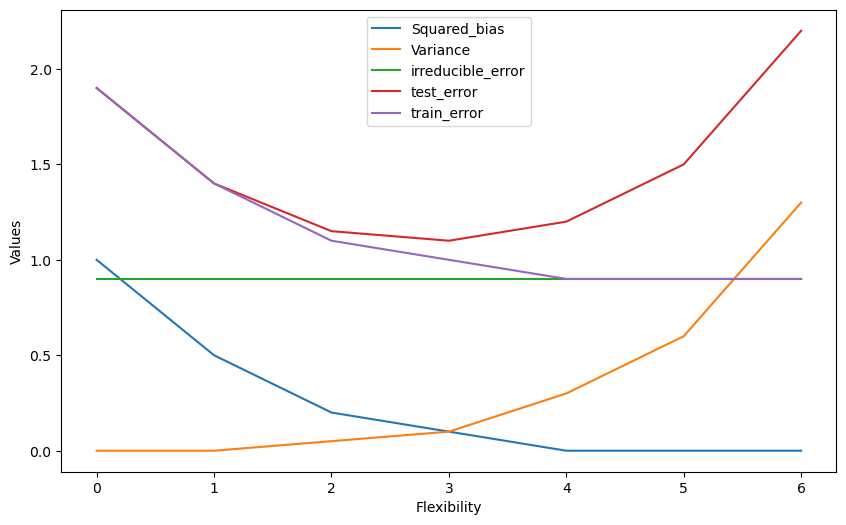

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Squared_bias': [1.0, 0.5, 0.2, 0.1, 0, 0, 0],
    'Variance':     [0,   0, 0.05  , 0.1, 0.3, 0.6, 1.3],
    'irreducible_error': [0.9, 0.9, 0.9, 0.9, 0.9,0.9,0.9],
}
df = pd.DataFrame(data)

df["test_error"]=df["Squared_bias"]+df["Variance"]+df['irreducible_error']
df["train_error"]=df["Squared_bias"]+df['irreducible_error']
# Plotting
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Flexibility')
plt.ylabel('Values')
plt.legend()
plt.show()


(b) Explain why each of the five curves has the shape displayed in part (a).

*Squared_bias*
- *Starts high in the case that the starting flexibility is below the number of degrees of freedom in $f(x)$, the decreases as the model is better able to approximate the real function.*

*Variance*
- *increases as the model gains more degrees of freedom.*


*irreducible error*
- *More specifically, $Var(\epsilon)$ naturally constant, since it is characteristic of the underlying process and not the model.*

*training error*
- *Reflects the sum of soruces of error other than model variability, as it is computed on one set of training data, and model variability reflects the way the model varies when trained on different sets of trainig data.*

*test error*
- *Reflects the sum of all sources of error.*


5. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

*Flexibility often leads to better predictions for real-world complicated phenomenon. Less flexible approaches are more interpetable, and work well with high noise, and simpler phenomenon*

*described above*

6. Describe the differences between a parametric and a non-parametric
statistical learning approach. What are the advantages of a para- metric approach to regression or classification (as opposed to a non- parametric approach)? What are its disadvantages?

*described above*

7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

In [28]:
data = {
    'X1': [0,2,0,0,-1,1],
    'X2': [3,0,1,1,0,1],
    'X3': [0,0,3,2,1,1],
    'Y': ["Red","Red","Red","Green","Green","Red"],
}
df = pd.DataFrame(data)
df.index=pd.Index([1,2,3,4,5,6])
df

,X1,X2,X3,Y
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


In [29]:
df["X1"]=df["X1"]**2
df["X2"]=df["X2"]**2
df["X3"]=df["X3"]**2
df[["X1","X2","X3"]].sum(axis=1)

1     9
2     4
3    10
4     5
5     2
6     3
dtype: int64

(b) What is our prediction with K = 1? Why?

*With K=1, the closest point is #5, which is Green, so we assign the test point "Green"*

(c) What is our prediction with K =3? Why?

*With K=3, the three closest points are 5, 6, 2, which are Green, Red, Red. So we assign Red.*

(d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

*Small K : this will allow all the small variations in the boundary to be caputured. A large K would allow distant influence, flattening the estimated boundary to be more linear.*